In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Membaca dataset
df = pd.read_csv(r"C:\Users\OPTION\Downloads\Python DA\[BELUM] Project 4_Data Reports of Video Games Sales (1980 - 2020)\vgsales.csv")
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [3]:
# Menampilkan informasi dasar
print("Dimensi awal dataset:", df.shape)

Dimensi awal dataset: (16598, 11)


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [5]:
print("Data awal:")
print(df.info())
print(df.describe())

# 2. Deteksi Duplikat dan Missing Values
print("\nJumlah data duplikat: ", df.duplicated().sum())
print("Jumlah missing values per kolom:\n", df.isnull().sum())

Data awal:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None
               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.8539

In [6]:
# 3. Deteksi Outliers menggunakan IQR untuk kolom numeric (misalnya, Global_Sales)
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)]

outliers = detect_outliers(df, 'Global_Sales')
print("\nJumlah outliers pada Global_Sales: ", outliers.shape[0])


Jumlah outliers pada Global_Sales:  1893


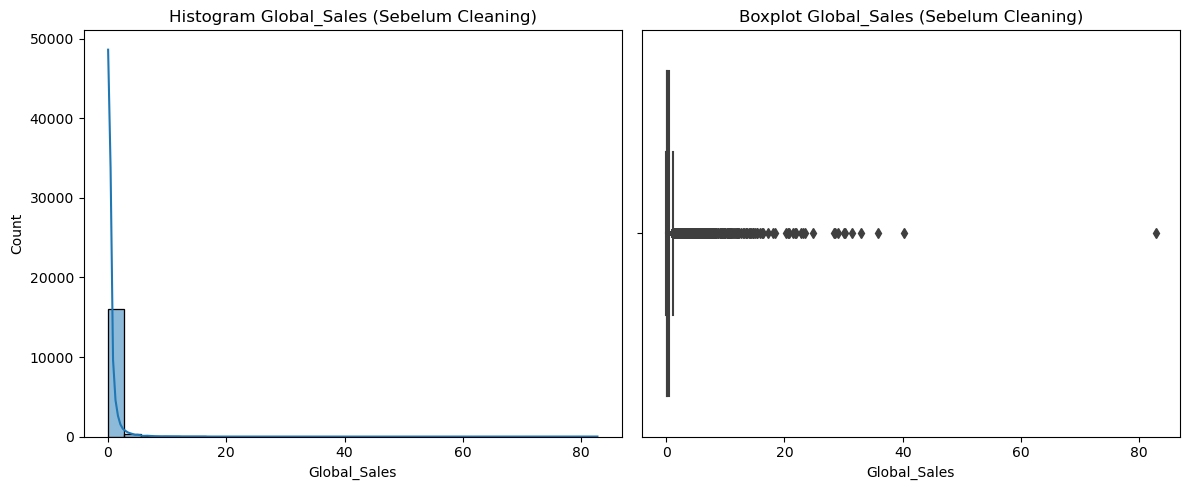

In [7]:
# Visualisasi histogram dan box plot sebelum cleaning
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Global_Sales'], bins=30, kde=True)
plt.title("Histogram Global_Sales (Sebelum Cleaning)")
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Global_Sales'])
plt.title("Boxplot Global_Sales (Sebelum Cleaning)")
plt.tight_layout()
plt.show()

In [8]:
# 4. Data Cleaning: Hapus duplikat, missing values, dan outliers
df_clean = df.drop_duplicates()
df_clean = df_clean.dropna()

# Hapus outlier pada Global_Sales (Anda bisa lakukan serupa untuk kolom numeric lain jika diperlukan)
Q1 = df_clean['Global_Sales'].quantile(0.25)
Q3 = df_clean['Global_Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_clean = df_clean[(df_clean['Global_Sales'] >= lower_bound) & (df_clean['Global_Sales'] <= upper_bound)]

print("\nSetelah Cleaning:")
print(df_clean.info())


Setelah Cleaning:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14465 entries, 1847 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          14465 non-null  int64  
 1   Name          14465 non-null  object 
 2   Platform      14465 non-null  object 
 3   Year          14465 non-null  float64
 4   Genre         14465 non-null  object 
 5   Publisher     14465 non-null  object 
 6   NA_Sales      14465 non-null  float64
 7   EU_Sales      14465 non-null  float64
 8   JP_Sales      14465 non-null  float64
 9   Other_Sales   14465 non-null  float64
 10  Global_Sales  14465 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.3+ MB
None


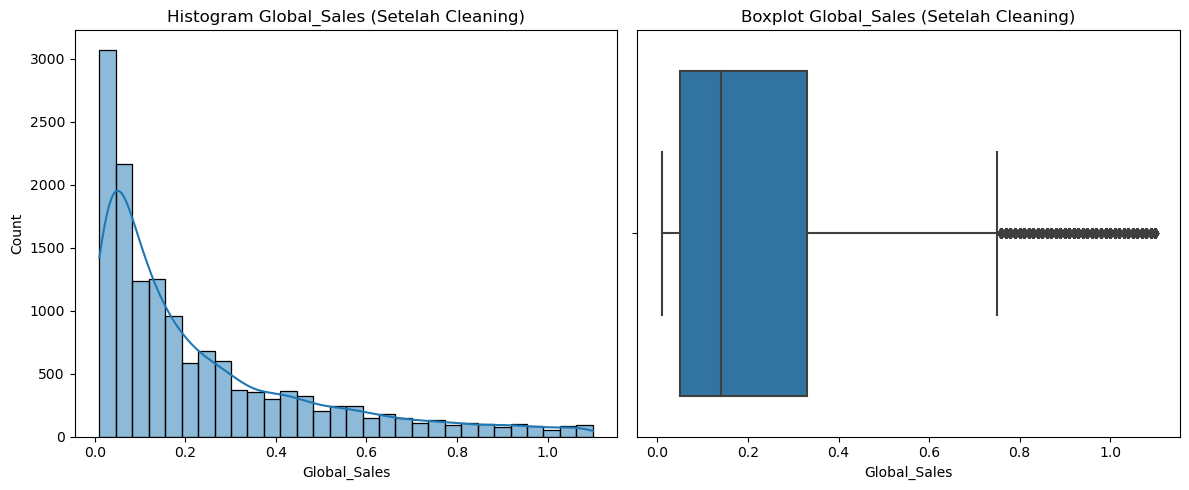

In [9]:
# Visualisasi histogram dan box plot setelah cleaning
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_clean['Global_Sales'], bins=30, kde=True)
plt.title("Histogram Global_Sales (Setelah Cleaning)")
plt.subplot(1, 2, 2)
sns.boxplot(x=df_clean['Global_Sales'])
plt.title("Boxplot Global_Sales (Setelah Cleaning)")
plt.tight_layout()
plt.show()

In [10]:
# Perbandingan data sebelum dan setelah cleaning
print("\nJumlah data sebelum cleaning: ", df.shape[0])
print("Jumlah data setelah cleaning: ", df_clean.shape[0])
# 5. Menyimpan dataset hasil cleaning
cleaned_filename = 'vgsales-CLEANED.csv'
df_clean.to_csv(cleaned_filename, index=False)
print("\nDataset hasil cleaning telah disimpan sebagai:", cleaned_filename)


Jumlah data sebelum cleaning:  16598
Jumlah data setelah cleaning:  14465

Dataset hasil cleaning telah disimpan sebagai: vgsales-CLEANED.csv


In [11]:
# Pastikan sudah memiliki df_clean dari langkah sebelumnya

# A. Horizontal Bar Charts
def horizontal_bar_chart(data, category, value, title, top_n=20):
    top_data = data.groupby(category)[value].sum().sort_values(ascending=False).head(top_n)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_data.values, y=top_data.index, orient='h')
    plt.title(title)
    plt.xlabel(value)
    plt.ylabel(category)
    # Menampilkan nilai di samping bar
    for index, value in enumerate(top_data.values):
        plt.text(value, index, f' {value:.2f}', va='center')
    plt.show()

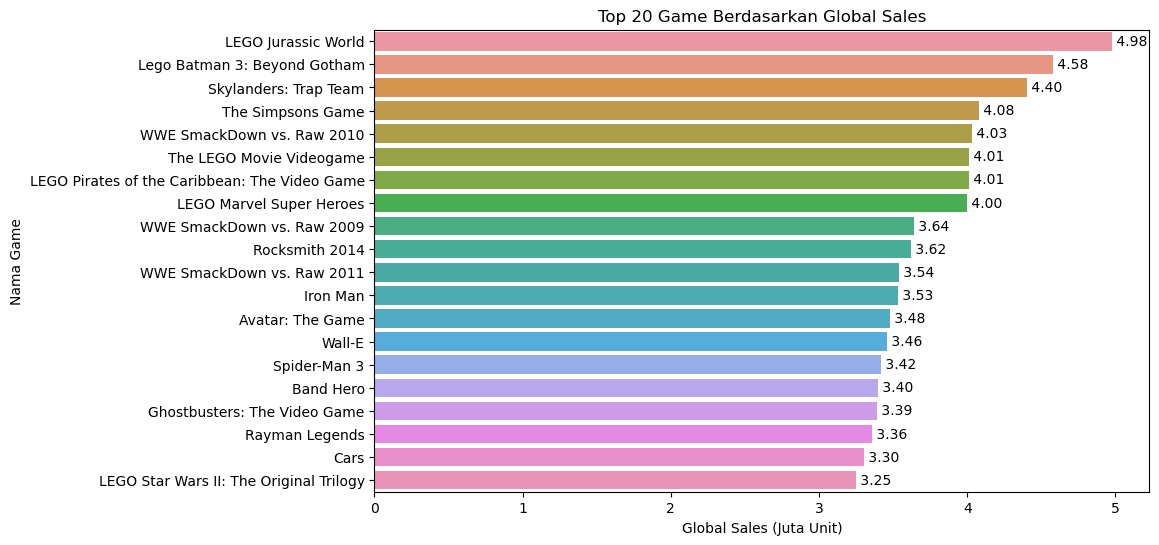

In [12]:
# 1. Top 20 Nama Produk (Game) Berdasarkan Global_Sales
top_games = df_clean.groupby('Name')['Global_Sales'].sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_games.values, y=top_games.index, orient='h')
plt.title("Top 20 Game Berdasarkan Global Sales")
plt.xlabel("Global Sales (Juta Unit)")
plt.ylabel("Nama Game")
for index, value in enumerate(top_games.values):
    plt.text(value, index, f' {value:.2f}', va='center')
plt.show()

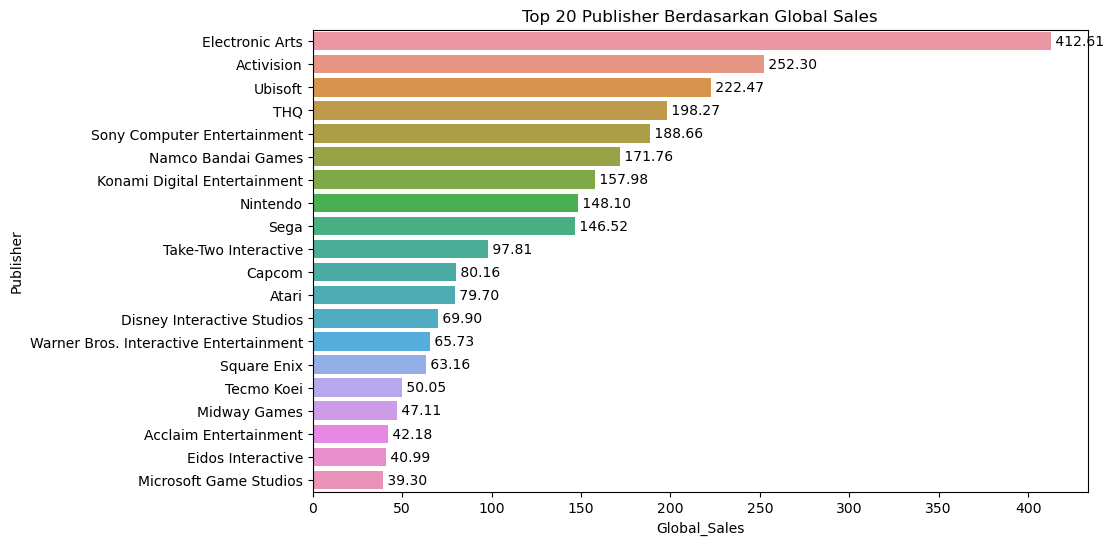

In [13]:
# 2. Top 20 Publisher Berdasarkan Global_Sales
horizontal_bar_chart(df_clean, 'Publisher', 'Global_Sales', "Top 20 Publisher Berdasarkan Global Sales")

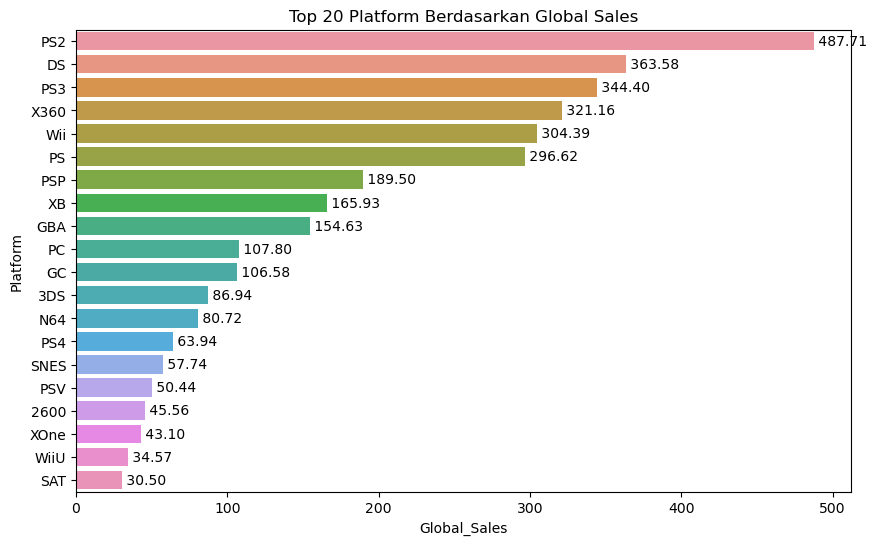

In [14]:
# 3. Top 20 Platform Berdasarkan Global_Sales
horizontal_bar_chart(df_clean, 'Platform', 'Global_Sales', "Top 20 Platform Berdasarkan Global Sales")

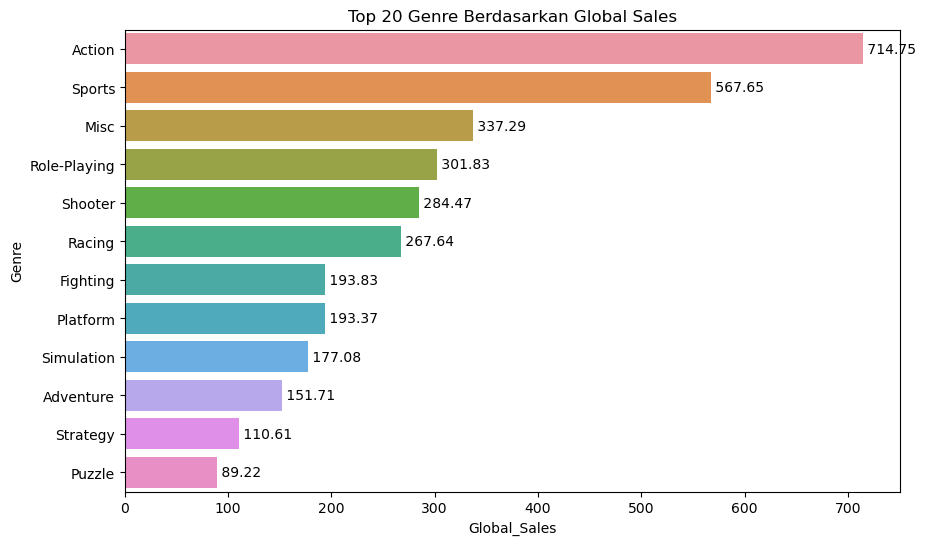

In [15]:
# 4. Bar Chart Genre Teratas Berdasarkan Global_Sales (Top 20, jika ada lebih dari 20)
horizontal_bar_chart(df_clean, 'Genre', 'Global_Sales', "Top 20 Genre Berdasarkan Global Sales")

In [16]:
# B. Line Charts: Penjualan per Tahun
# Pastikan kolom Year bertipe numerik dan tidak ada missing
df_clean['Year'] = pd.to_numeric(df_clean['Year'], errors='coerce')
df_clean = df_clean.dropna(subset=['Year'])
df_clean['Year'] = df_clean['Year'].astype(int)

def line_chart_sales(data, group_by, title):
    # Agregasi Global_Sales per Tahun berdasarkan group
    agg_data = data.groupby([group_by, 'Year'])['Global_Sales'].sum().reset_index()
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=agg_data, x='Year', y='Global_Sales', hue=group_by, marker='o')
    plt.title(title)
    plt.xlabel("Year")
    plt.ylabel("Global Sales (Juta Unit)")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

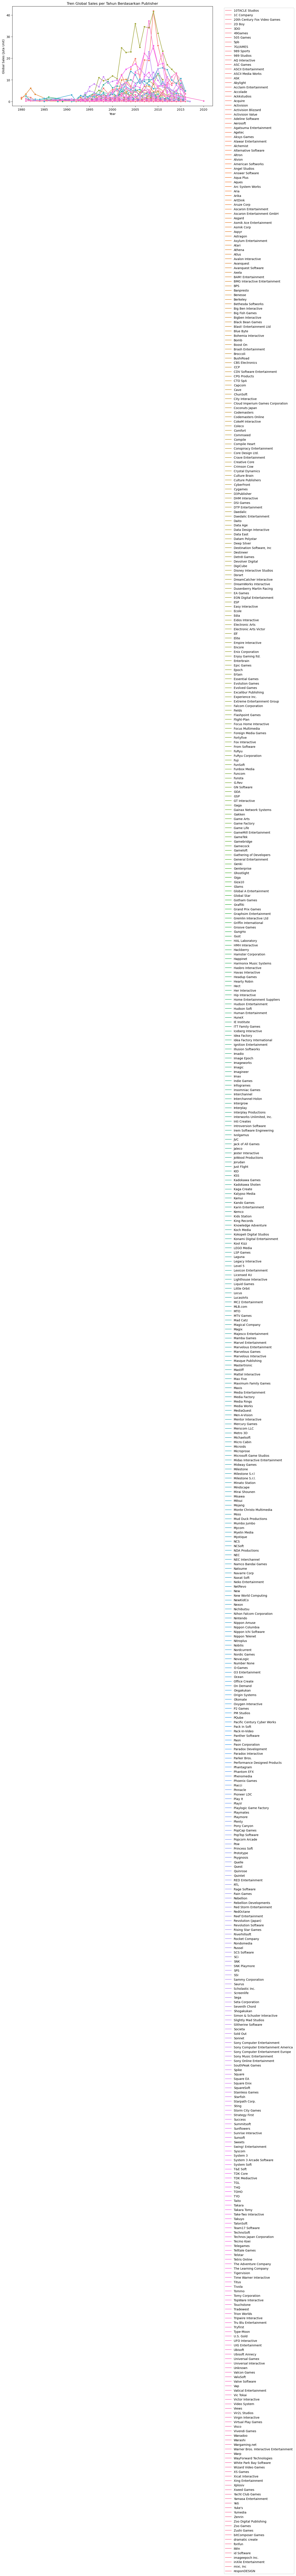

In [17]:
# 5. Line Chart berdasarkan Publisher
line_chart_sales(df_clean, 'Publisher', "Tren Global Sales per Tahun Berdasarkan Publisher")

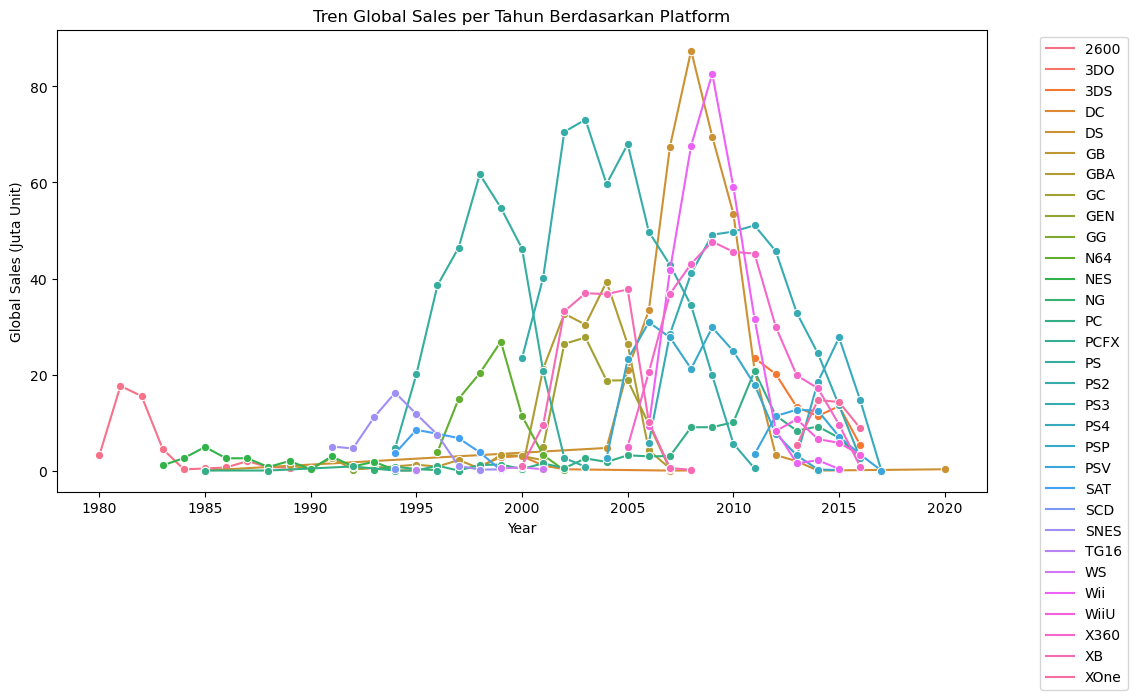

In [18]:
# 6. Line Chart berdasarkan Platform
line_chart_sales(df_clean, 'Platform', "Tren Global Sales per Tahun Berdasarkan Platform")

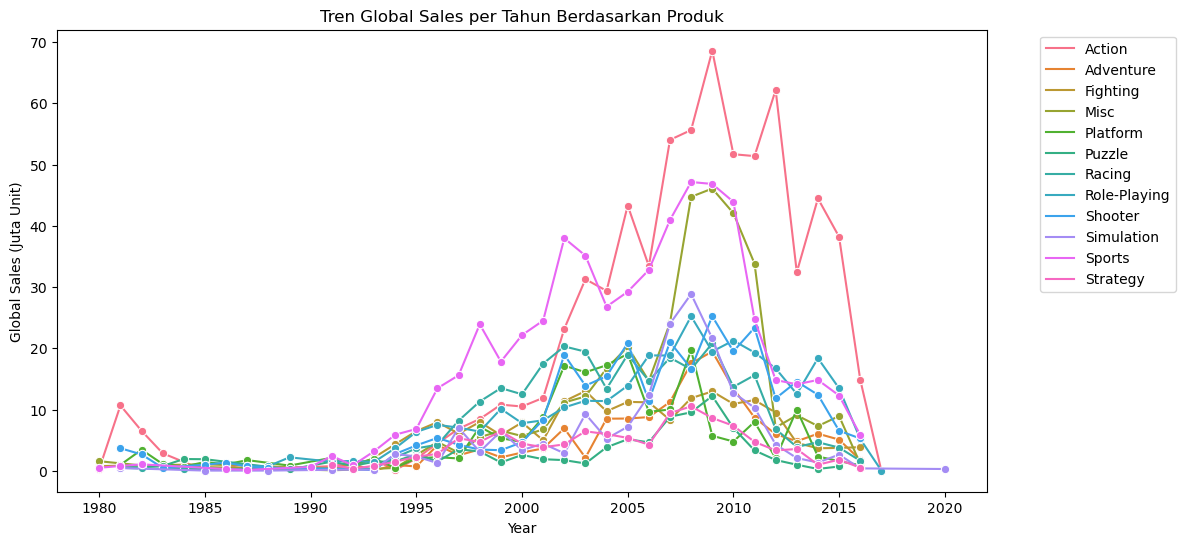

In [22]:
# 7. Line Chart berdasarkan Genre
line_chart_sales(df_clean, 'Genre', "Tren Global Sales per Tahun Berdasarkan Produk")

In [20]:
# C. Summary Metrics
print("Jumlah Publisher: ", df_clean['Publisher'].nunique())
print("Jumlah Genre: ", df_clean['Genre'].nunique())
print("Jumlah Produk: ", df_clean['Name'].nunique())
print("Jumlah Platform: ", df_clean['Platform'].nunique())

Jumlah Publisher:  568
Jumlah Genre:  12
Jumlah Produk:  10413
Jumlah Platform:  31


In [21]:
# import streamlit as st
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Membaca data hasil cleaning
# df = pd.read_csv('vgsales-CLEANED.csv')

# st.title("Dashboard Data VGSales")

# st.header("Summary Metrics")
# col1, col2, col3, col4 = st.columns(4)
# col1.metric("Publisher", df['Publisher'].nunique())
# col2.metric("Genre", df['Genre'].nunique())
# col3.metric("Produk", df['Name'].nunique())
# col4.metric("Platform", df['Platform'].nunique())

# st.header("Top 20 Game Berdasarkan Global Sales")
# top_games = df.groupby('Name')['Global_Sales'].sum().sort_values(ascending=False).head(20)
# fig, ax = plt.subplots(figsize=(10, 6))
# sns.barplot(x=top_games.values, y=top_games.index, orient='h', ax=ax)
# ax.set_title("Top 20 Game Global Sales")
# ax.set_xlabel("Global Sales (Juta Unit)")
# ax.set_ylabel("Nama Game")
# for index, value in enumerate(top_games.values):
#     ax.text(value, index, f' {value:.2f}', va='center')
# st.pyplot(fig)

# st.header("Tren Global Sales per Tahun Berdasarkan Publisher")
# df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
# df = df.dropna(subset=['Year'])
# df['Year'] = df['Year'].astype(int)
# agg_pub = df.groupby(['Publisher', 'Year'])['Global_Sales'].sum().reset_index()
# fig2, ax2 = plt.subplots(figsize=(12, 6))
# sns.lineplot(data=agg_pub, x='Year', y='Global_Sales', hue='Publisher', marker='o', ax=ax2)
# ax2.set_title("Tren Global Sales per Tahun (Publisher)")
# st.pyplot(fig2)

# # Tambahkan visualisasi lain sesuai kebutuhan...

# st.write("Dashboard ini mengintegrasikan beberapa visualisasi untuk analisis mendalam terhadap dataset VGSales.")
